### Objective Of this Project:  To analyse the sentiments and categorised the product as positive, negative or neutral.

#### Requirement:) Nowadays, the common people reviews matters a lot when a person wants to buy something.
#### We can see from the example that Google shows those websites on top which have good comments on the websites posted by the people. So, it need to be identify, which review is negative and affecting the marketing of product.

In [198]:

# importing required libraries

import pandas as pd # for analysing the data
import numpy as np # for mathematical collections on arrays
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import sklearn as skl # for machine learning algorithms

import nltk # natural language toolkit
# snowball represents a ball type in which all similar words like cared, caring etc and 
# stemmer means all words come under a common stem i.e care in this example.
stemmer=nltk.SnowballStemmer(language="english") 

nltk.download("stopwords")
from nltk.corpus import stopwords # corpus means single collection and corpora means multiple collection of data
stopwords=set(stopwords.words("english")) # make a set of particular english words 


import string # used for purpose of cleaning

import re # for regular expression

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

import pickle

from bs4 import BeautifulSoup
import contractions

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###  Get the Data

In [199]:
# Reading the CSV file

data=pd.read_csv("flipkart_data.csv")
data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5
...,...,...
484,The right and left distribution is not okay......,4
485,"nice Bluetooth headphone, I am pleased with it...",5
486,excellent sound quality with deep bass. good b...,5
487,this is a very good product boat headphone goo...,5


### Explore and visualize the data to gain insights

In [200]:
data.insert(0, "id",np.arange(1, len(data) + 1))

In [201]:
# Showing first 5 rows
data.head()

,id,review,rating
0,1,It was nice produt. I like it's design a lot. ...,5
1,2,awesome sound....very pretty to see this nd th...,5
2,3,awesome sound quality. pros 7-8 hrs of battery...,4
3,4,I think it is such a good product not only as ...,5
4,5,Awsome sound powerful bass battery backup is a...,5


In [202]:
# get information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      489 non-null    int32 
 1   review  489 non-null    object
 2   rating  489 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 9.7+ KB


#### Infer:  The table has 489 entries and all 489 are non-null for both columns.

In [203]:
# Is there any null values present in the data? IF yes, the sum is:)
data.isnull().sum()

id        0
review    0
rating    0
dtype: int64

In [204]:
data.describe()

,id,rating
count,489.000000,489.000000
mean,245.000000,4.370143
std,141.306405,0.921070
min,1.000000,1.000000
25%,123.000000,4.000000
50%,245.000000,5.000000
75%,367.000000,5.000000
max,489.000000,5.000000


#### Infer: Average rating is approximately 4.37 and the product is not so bad.

In [205]:

def clean(text):
    text=str(text).lower()
    text=re.sub("https://\S+ | www\.\S+", "", text)                # removing website starting protocols links  
    text=re.sub("#[\w]*", "", text)                                # removing special tags like #awesome
    text=re.sub("<.*?>", "", text)                                 # removing html tags
    text=re.sub('\n', "", text)                                    # removing new lines
    text=re.sub("\w*\d\w*", "", text)
    
    soup = BeautifulSoup(text)
    text = soup.get_text() # Remove HTML TAGS If any left
    text= text.encode('ascii','ignore') # Remove emojis and errors
    text=text.decode()
    text=contractions.fix(text) # Changing you're -> you are | Removing contractions
    
    text=text.translate(str.maketrans('','',string.punctuation))  # 1st parameter represents what need to be replaced, 2nd parameter represents what need to be placed instead of replaced word, and 3rd parameter represents what need to be deleted
    text=[stemmer.stem(word) for word in text.split(" ") if word not in stopwords] # it finds the stem word (basic word ) for example: cared ->care
    text=" ".join(text)
    
    lookup_dict = { 'dm':'direct message', "awsm" : "awesome", "luv" :"love" , "easi": "easy"} # Removing Abbreviation
    text = ' '.join( [lookup_dict[word] if word in lookup_dict.keys() else word for word in text.split()]) 
    
    return text
    

In [206]:
# Cleaning the data using regular expression
data['review']=data['review'].apply(clean)
data

C:\Users\priya\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



,id,review,rating
0,1,nice produt like design lot easy carri look st...,5
1,2,awesom soundveri pretti see nd sound qualiti g...,5
2,3,awesom sound qualiti pros hrs batteri life inc...,4
3,4,think good product per qualiti also design qui...,5
4,5,awsom sound power bass batteri backup also exc...,5
...,...,...,...
484,485,right left distribut okayotherwis sound qualit...,4
485,486,nice bluetooth headphon pleas perform day use ...,5
486,487,excel sound qualiti deep bass good batteri bac...,5
487,488,good product boat headphon good best also nice...,5


In [207]:
ratings=data['rating'].value_counts()
ratings

5    280
4    146
3     42
1     15
2      6
Name: rating, dtype: int64

In [208]:
# Data Visualisation
ratings=data['rating'].value_counts()
categories=ratings.index
quantities=ratings.values

import plotly.express as px
figure=px.pie(data, 
             values=quantities,
             names=categories)

figure.show()

C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



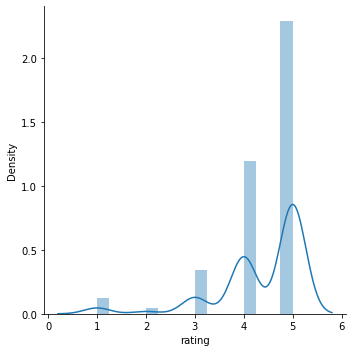

In [209]:
# In other way using histogram 
sns.FacetGrid(data, size=5).map(sns.distplot, "rating")
plt.show()

# mostly rating lies in 4 to 5 range 

#### Infer: approx 60 percent ratings flipkart got for that particular product is 5.

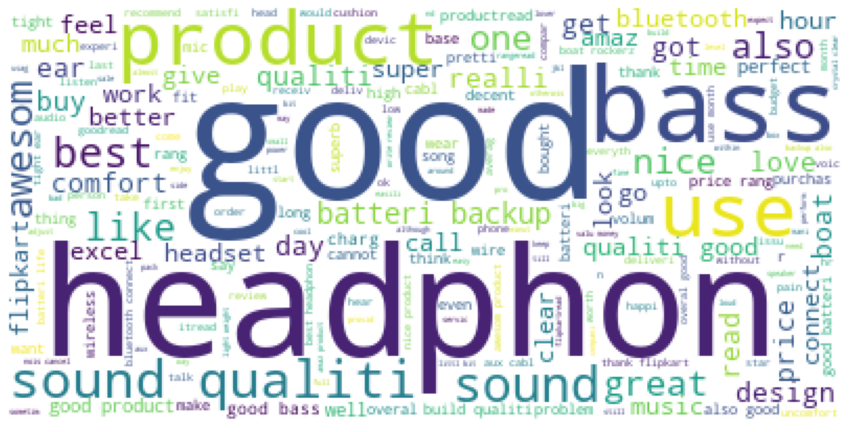

In [210]:
text=" ".join(i for i in data.review)
wordcloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


###  Infer: 
#### The more the size of word, the more times that are in the reviews.
####  We can see that both good and headphon are the two words which are big in size. So it tells that many people have given review that headphones are good.

In [211]:
# Analysing the scores of reviews to be positive, negative and neutral

nltk.download('vader_lexicon')
sentiment=SentimentIntensityAnalyzer()

data['Positive']=[sentiment.polarity_scores(i)['pos'] for i in data.review]
data['Negative']=[sentiment.polarity_scores(i)['neg'] for i in data.review]
data['Neutral']=[sentiment.polarity_scores(i)['neu'] for i in data.review]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,review,rating,Positive,Negative,Neutral
0,1,nice produt like design lot easy carri look st...,5,0.577,0.000,0.423
1,2,awesom soundveri pretti see nd sound qualiti g...,5,0.471,0.000,0.529
2,3,awesom sound qualiti pros hrs batteri life inc...,4,0.194,0.000,0.806
3,4,think good product per qualiti also design qui...,5,0.393,0.049,0.558
4,5,awsom sound power bass batteri backup also exc...,5,0.486,0.030,0.484


In [212]:
x= sum(data['Positive'])
y= sum(data['Negative'])
z= sum(data['Neutral'])

In [213]:
# reviews having negative sentiments more than 30 percent
data[data['Negative']>0.30]

,id,review,rating,Positive,Negative,Neutral


In [214]:

def max_sentiment_score(x, y, z):
    if(x>y and x>z):
        return 'Positive'
    elif (y>x and y>z):
        return 'Negative'
    else:
        return 'Neutral'
    
max_sentiment_score(x, y, z)

'Neutral'

#### Infer: Maximum Sentiment Score is 'Neutral '. It means that if we will add up the sentiment effect of reviews on the people, it will not impact positive on the person surely. It can affect positive or negative acccording to the comments, he/she is reading.

### Model Training

In [215]:
data['Output']=np.where((data['Positive']+data['Neutral']>0.80), 'Happy', 'Unhappy')
data.head()

,id,review,rating,Positive,Negative,Neutral,Output
0,1,nice produt like design lot easy carri look st...,5,0.577,0.000,0.423,Happy
1,2,awesom soundveri pretti see nd sound qualiti g...,5,0.471,0.000,0.529,Happy
2,3,awesom sound qualiti pros hrs batteri life inc...,4,0.194,0.000,0.806,Happy
3,4,think good product per qualiti also design qui...,5,0.393,0.049,0.558,Happy
4,5,awsom sound power bass batteri backup also exc...,5,0.486,0.030,0.484,Happy


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Output', ylabel='count'>

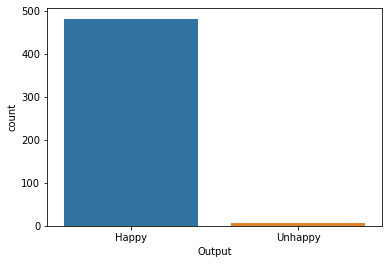

In [216]:
# is data balanced?

sns.countplot(data['Output'])

#### Infer: We can see that our data is imbalanced so that if we will train our data, it will be trained inaccurately.



In [217]:
data['Output']=np.where(data['rating']>4, 'Happy', 'Unhappy')

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Output', ylabel='count'>

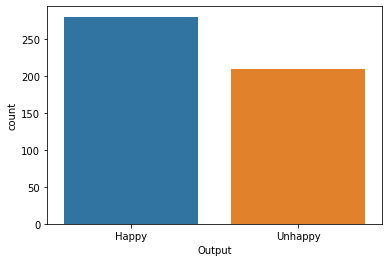

In [218]:
# Now, is data balanced?

sns.countplot(data['Output'])

#### Wooh!, Yes Now data is almost balanced.

#### Good to go

In [219]:
data["Character Counts"]=[len(i) for i in data.review]
data

,id,review,rating,Positive,Negative,Neutral,Output,Character Counts
0,1,nice produt like design lot easy carri look st...,5,0.577,0.000,0.423,Happy,55
1,2,awesom soundveri pretti see nd sound qualiti g...,5,0.471,0.000,0.529,Happy,85
2,3,awesom sound qualiti pros hrs batteri life inc...,4,0.194,0.000,0.806,Unhappy,330
3,4,think good product per qualiti also design qui...,5,0.393,0.049,0.558,Happy,207
4,5,awsom sound power bass batteri backup also exc...,5,0.486,0.030,0.484,Happy,277
...,...,...,...,...,...,...,...,...
484,485,right left distribut okayotherwis sound qualit...,4,0.225,0.000,0.775,Unhappy,88
485,486,nice bluetooth headphon pleas perform day use ...,5,0.368,0.000,0.632,Happy,101
486,487,excel sound qualiti deep bass good batteri bac...,5,0.393,0.000,0.607,Happy,95
487,488,good product boat headphon good best also nice...,5,0.754,0.000,0.246,Happy,65


In [220]:
data["Word Counts"]=[len(i.split()) for i in data.review]
data

,id,review,rating,Positive,Negative,Neutral,Output,Character Counts,Word Counts
0,1,nice produt like design lot easy carri look st...,5,0.577,0.000,0.423,Happy,55,9
1,2,awesom soundveri pretti see nd sound qualiti g...,5,0.471,0.000,0.529,Happy,85,14
2,3,awesom sound qualiti pros hrs batteri life inc...,4,0.194,0.000,0.806,Unhappy,330,48
3,4,think good product per qualiti also design qui...,5,0.393,0.049,0.558,Happy,207,34
4,5,awsom sound power bass batteri backup also exc...,5,0.486,0.030,0.484,Happy,277,46
...,...,...,...,...,...,...,...,...,...
484,485,right left distribut okayotherwis sound qualit...,4,0.225,0.000,0.775,Unhappy,88,11
485,486,nice bluetooth headphon pleas perform day use ...,5,0.368,0.000,0.632,Happy,101,14
486,487,excel sound qualiti deep bass good batteri bac...,5,0.393,0.000,0.607,Happy,95,16
487,488,good product boat headphon good best also nice...,5,0.754,0.000,0.246,Happy,65,10


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                489 non-null    int32  
 1   review            489 non-null    object 
 2   rating            489 non-null    int64  
 3   Positive          489 non-null    float64
 4   Negative          489 non-null    float64
 5   Neutral           489 non-null    float64
 6   Output            489 non-null    object 
 7   Character Counts  489 non-null    int64  
 8   Word Counts       489 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 32.6+ KB


In [222]:
data.describe()

,id,rating,Positive,Negative,Neutral,Character Counts,Word Counts
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.00000,489.000000
mean,245.000000,4.370143,0.375973,0.034063,0.589955,155.06135,24.609407
std,141.306405,0.921070,0.157373,0.055072,0.142564,74.82907,12.069335
min,1.000000,1.000000,0.000000,0.000000,0.169000,30.00000,4.000000
25%,123.000000,4.000000,0.260000,0.000000,0.495000,95.00000,15.000000
50%,245.000000,5.000000,0.373000,0.000000,0.591000,137.00000,21.000000
75%,367.000000,5.000000,0.486000,0.063000,0.696000,208.00000,33.000000
max,489.000000,5.000000,0.831000,0.298000,1.000000,342.00000,59.000000


In [223]:
data.to_csv("data_new.csv")

Text(0.5, 1.0, 'Character Counts vs Word Counts of reviews with categorical variable of Output')

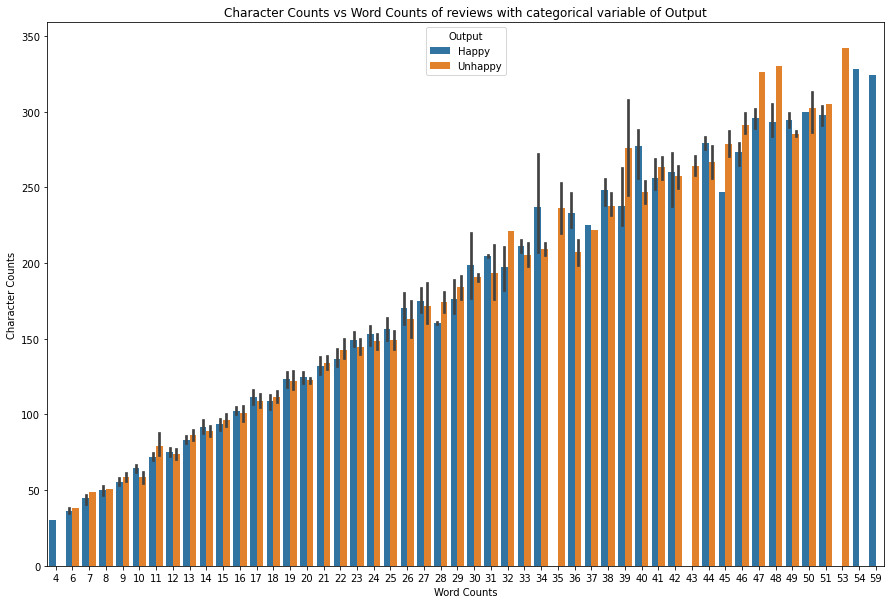

In [224]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Word Counts', y='Character Counts', hue='Output', data=data)
plt.title('Character Counts vs Word Counts of reviews with categorical variable of Output')

Text(0.5, 1.0, 'Output vs Word Counts of reviews')

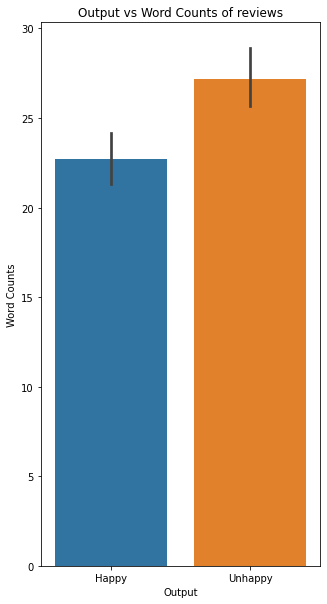

In [225]:
plt.figure(figsize=(5, 10))
sns.barplot(x='Output', y='Word Counts', data=data)
plt.title('Output vs Word Counts of reviews')

#### Infer: Both unhappy and happy ones have written same number of words almost.

In [226]:
from sklearn.model_selection import train_test_split

Independent_var=data.review
dependent_var=data.Output

ID_train, ID_test, D_train, D_test=train_test_split(Independent_var, dependent_var, test_size=0.3 )

In [227]:
ID_train.head()
D_train.shape

(342,)

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidfvector=TfidfVectorizer()
classifier=LogisticRegression(solver="lbfgs")

from sklearn.pipeline import Pipeline

model=Pipeline([('vectorizer', tfidfvector), ('classifier', classifier)])
model.fit(ID_train, D_train)


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
predictions=model.predict(ID_test)
print(confusion_matrix(predictions, D_test))
print("Accuracy of the model: ", accuracy_score(D_test, predictions))
print("Precision of the model: ", precision_score(D_test, predictions, average=None))
print("Recall of the model: ", recall_score(D_test, predictions, average=None))
print("F Score of the model: ", f1_score(D_test, predictions, average=None))

[[79 34]
 [ 4 30]]
Accuracy of the model:  0.7414965986394558
Precision of the model:  [0.69911504 0.88235294]
Recall of the model:  [0.95180723 0.46875   ]
F Score of the model:  [0.80612245 0.6122449 ]


In [229]:
zipped_data=zip(list(np.array(ID_train)), list(np.array(D_test)), list(predictions))
for i, j, k in zipped_data:
    print("Review: ", i)
    print("Target:  ",j)
    print("Prediction: ",k)
    print()
    
zipped_data

Review:  awesom product super qualiti clear n high volum sound chang song cushion qualiti goodread
Target:   Unhappy
Prediction:  Unhappy

Review:  use month bass excellentit like nois cancel headphonesth sound goodbut sometim right one make troubl connect bluetoothbut due wireprovid defectit occur connect bluetoothbut overal nice stylish headset experi music ignor worldread
Target:   Unhappy
Prediction:  Unhappy

Review:  almost year purchas thisapril work date use first timether one drawback gave star mic good call play game work awesom call voic clear siderest assur best headphon price rang would tell go itread
Target:   Happy
Prediction:  Happy

Review:  dissipoint comfort bad ear hard listen music hhhhh pain start also tight cushion good bakwass sound quit good bass nice trebl absentmid ok type build qualiti good special plastic use conread
Target:   Happy
Prediction:  Happy

Review:  batteri backup awesom design good work well distanc connect easili easy use wellread
Target:   Un